# Laboratorio 4
## QuickSort
Metodo basato sul paradigma di _divide et impera_.

### Come funziona in teoria
1. Illustrare il funzionamento di *PARTITION* sull'array $A = \langle 13, 19, 9, 5, 12, 8, 7, 4, 21, 2, 6, 11 \rangle$, supponendo di scegliere come pivot l'ultimo elemento dell'array.
$$
\langle 13,19,9,5,12,8,7,4,21,2,6,11\rangle, \\
\langle 13,19,9,5,12,8,7,4,21,2,6,11\rangle, \\
\langle 13,19,9,5,12,8,7,4,21,2,6,11\rangle, \\
\langle 9,19,13,5,12,8,7,4,21,2,6,11\rangle, \\
\langle 9,5,13,19,12,8,7,4,21,2,6,11\rangle, \\
\langle 9,5,13,19,12,8,7,4,21,2,6,11\rangle, \\
\langle 9,5,8,19,12,13,7,4,21,2,6,11\rangle, \\
\langle 9,5,8,7,12,13,19,4,21,2,6,11\rangle, \\
\langle 9,5,8,7,4,13,19,12,21,2,6,11\rangle, \\
\langle 9,5,8,7,4,13,19,12,21,2,6,11\rangle, \\
\langle 9,5,8,7,4,2,19,12,21,13,6,11\rangle, \\
\langle 9,5,8,7,4,2,6,12,21,13,19,11\rangle, \\
\langle 9,5,8,7,4,2,6,11,21,13,19,12\rangle
$$

2. Utilizzare il metodo della sostituzione per dimostrare che la ricorrenza $T(n)=T(n-1)+\Theta(n)$ ha soluzione $T(n) = \Theta(n^2). $
$$
\begin{aligned}
T(n) & =   T(n - 1) + c_2n \\\\
     & \le c_1(n - 1)^2 + c_2n \\\\
     & =   c_1n^2 - 2c_1 n + c_2n + c_1  & (2c_1 > c_2, n \ge c_1 / (2c_1 - c_2)) \\\\
     & \le c_1n^2.
\end{aligned}
$$

### Implementazione con Python
Implementeremo:
- La funzione _partition_ che risistema il sottoarray A[p,...,r] in loco.
- La funzione _quicksort_ per l'ordinamento 

In [1]:
import copy
A = [1, 2, 38, 7, 4, 7, 88, 130, 10]

In [4]:
def partition(A: list[int], p: int, r: int) -> int:
    """
    Funzione che partiziona gli elementi di A, dall'indice p all'indice r in due gruppi, 
    rispetto al valore di A in r. 
    Restituisce un indice i che gode delle seguenti proprietà:
    - A[i] assume il valore a
    - A[p, i-1] contiene i valori minori o uguali ad a 
    - A[i+1, r] contiene i valori maggiori o uguali ad a 
    
    Args:
    - A (list[int]):    la lista di interi da partizionare
    - p (int):          l'indice di inizio della partizione
    - r (int):          l'indice di fine della partizione
    
    Returns:
    - int: l'indice i
    """
    assert p <= r, "p deve essere minore o uguale a r"
    pivot = A[r]
    i = p - 1
    for j in range(p, r): 
        if A[j] < pivot: 
            i += 1
            A[j], A[i] = A[i], A[j]
    A[i+1], A[r] = A[r], A[i+1]

    return i+1

Applichiamo la funzione di partizionamento al nostro array A:

In [5]:
_ = partition(A, 0, len(A)-1)
A

[1, 2, 7, 4, 7, 10, 38, 130, 88]

Ora vediamo la funzione di _quicksort_ che sfrutta la partizione di ordinamento appena vista.

In [6]:
def quicksort(A: list[int], p: int, r: int) -> list[int]:
    """
    Algoritmo di ordinamento quicksort.
    Ordina la lista di interi A dal valore minore a quello maggiore.
    
    Args:
    - A (list[int]):    la lista di interi da ordinare
    - p (int):          l'indice di inizio della porzione di lista da ordinare
    - r (int):          l'indice di fine della porzione di lista da ordinare
    
    Returns:
    - list[int]: la lista di interi ordinata
    """
    if p <= r:
        q = partition(A, p, r)
        quicksort(A, p, q-1)
        quicksort(A, q+1, r)

    return A

In [7]:
A = [1, 2, 38, 7, 4, 7, 88, 74, 32, 89, 56, 6, 31, 100, 130, 0]

In [8]:
quicksort(A, 0, len(A)-1)
A

[0, 1, 2, 4, 6, 7, 7, 31, 32, 38, 56, 74, 88, 89, 100, 130]

#### Analisi del caso peggiore

Il caso peggiore per _quickSort_ si verifica quando la partizione produce un sottoarray con n-1 elementi e uno con 0 elementi. Questo caso si verifica quando l'array è già ordinato o è ordinato al contrario. In questo caso, il tempo di esecuzione è $\Theta(n^2)$.
Vediamo un esempio nel quale faremo in modo di ottenere sempre il caso peggiore e misuriamo i tempi di esecuzione per diversi valori di n.

In [9]:
def verify_order(A):
    for i in range(1, len(A)):
        assert A[i-1] <= A[i], "Array non ordinato"
    

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:01<00:00,  5.86it/s]


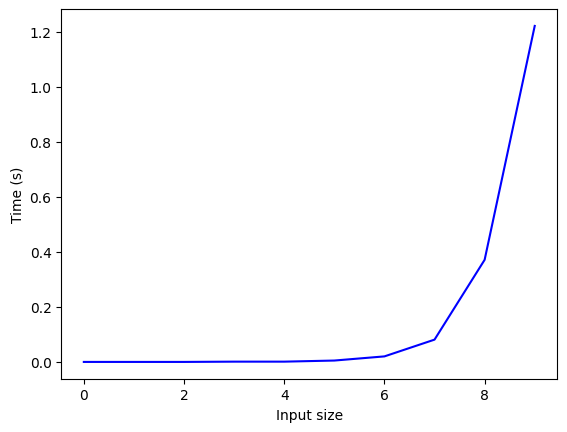

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

max_pow = 12
times = []
for i in tqdm(range(2,max_pow)):
    A = np.linspace(0, 2**i, 2**i)
    since = time.time()
    quicksort(A, 0, len(A)-1)
    times.append(time.time() - since)
    verify_order(A)

plt.plot(times, c="blue", label="times")
plt.xlabel("Input size")
plt.ylabel("Time (s)")
plt.show()

#### Euristiche per evitare il caso peggiore

* Ripetere l'implementazione di _quicksort_, aggiungendo una delle modalità mostrate a lezione per evitare di ottenere il caso peggiore ad ogni iterazione.
* Ricalcolare i tempi di esecuzione per diversi valori di n e confrontarli con quelli ottenuti in precedenza.
* Confrontare i tempi di esecuzione con quelli ottenuti con l'implementazione di _mergeSort_.

In [18]:
def quicksort_improved(A, p, r):
    """ 
    # choose the median between 3 random elements
    if r-p > 3:
        # choose 3 elements randomly
        idx = np.random.choice(list(range(p,r)), 3, replace=False)
        # index of the pivot
        pivot_idx = np.where(A == np.median([A[i] for i in idx]))[0][0]
        # move pivot to the end 

        A[pivot_idx], A[r] = A[r], A[pivot_idx]"""
        
    if p <= r:
        # choose a different random pivot each time
        pivot_idx = np.random.randint(p, r) if p < r else p 
        A[pivot_idx], A[r] = A[r], A[pivot_idx]
        q = partition(A, p, r)
        quicksort_improved(A, p, q-1)
        quicksort_improved(A, q+1, r)
    return A


In [19]:
# just to verify it does exactly the same as before
A = [1, 2, 38, 7, 4, 7, 88, 74, 32, 89, 56, 6, 31, 100, 130, 0]
quicksort_improved(copy.deepcopy(A), 0, len(A)-1)

[0, 1, 2, 4, 6, 7, 7, 31, 32, 38, 56, 74, 88, 89, 100, 130]

100%|██████████| 10/10 [00:00<00:00, 912.24it/s]


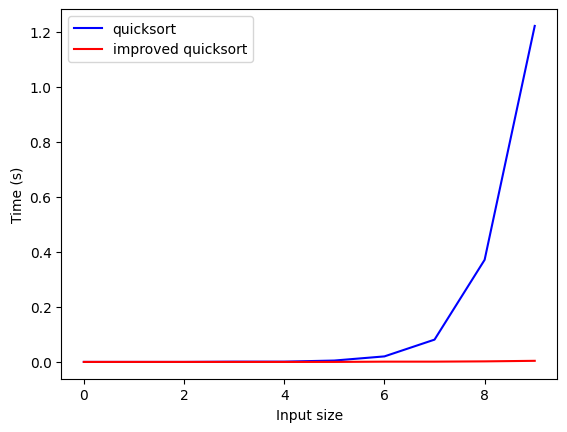

In [20]:
max_pow = 10
improved_times = []
for i in tqdm(range(max_pow)):
    A = np.linspace(0, 2**i, 2**i)
    since = time.time()
    quicksort_improved(A, 0, len(A)-1)
    improved_times.append(time.time() - since)
    verify_order(A)

plt.plot(times, c="blue", label="quicksort")
plt.plot(improved_times, c="red", label="improved quicksort")
plt.xlabel("Input size")
plt.ylabel("Time (s)")
plt.legend()

#### Comparazione con *mergeSort*

In [21]:
# In-place implementation of ****Merge sort****
def merge_sort_in_place(lst: list[float]) -> None:
    if len(lst) > 1:
        mid = len(lst) // 2
        left_half = lst[:mid]
        right_half = lst[mid:]
        merge_sort_in_place(left_half)
        merge_sort_in_place(right_half)
        merge(lst, left_half, right_half)

def merge(lst, left_half, right_half):
    i = j = k = 0

    # Merge the two halves back into lst
    while i < len(left_half) and j < len(right_half):
        if left_half[i] < right_half[j]:
            lst[k] = left_half[i]
            i += 1
        else:
            lst[k] = right_half[j]
            j += 1
        k += 1

    # Copy any remaining elements from left_half and right_half, if any
    while i < len(left_half):
        lst[k] = left_half[i]
        i += 1
        k += 1
        
    while j < len(right_half):
        lst[k] = right_half[j]
        j += 1
        k += 1 

100%|██████████| 10/10 [00:00<00:00, 1661.37it/s]


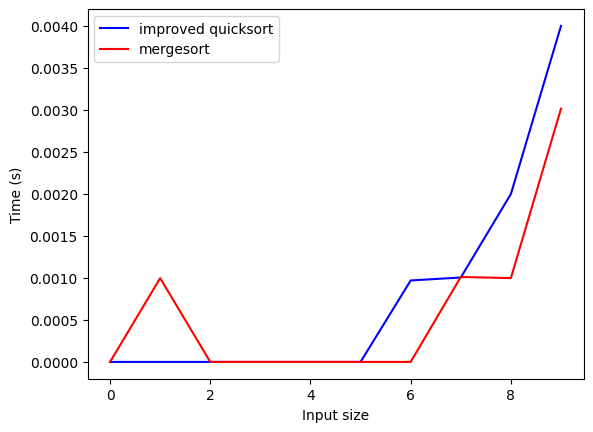

In [22]:
quicksort_times = improved_times
merge_sort_times = []

for i in tqdm(range(max_pow)):
    A = np.linspace(0, 2**i, 2**i)
    since = time.time()
    merge_sort_in_place(A)
    merge_sort_times.append(time.time() - since)
    verify_order(A)

plt.plot(quicksort_times, c="blue", label="improved quicksort")
plt.plot(merge_sort_times, c="red", label="mergesort")
plt.xlabel("Input size")
plt.ylabel("Time (s)")
plt.legend()